In [ ]:
#! /usr/bin/env python
# Test photometry
# Simple plots eg. colour-colour
# Match and compare deep data to wide, per galaxy

!jupyter nbconvert --to script TestPhotometry_deep.ipynb

from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
import h5py as h
from astropy.table import Table,join

In [4]:
#read in Erin's catalogue
cosmosfile='/global/homes/a/aamon/DES/DEStests/DEEP/MOFcats/SN-C3/run-vd03-SN-C3_C01_r3688p01.fits'
cosmosfile='/global/project/projectdirs/des/y3-image-sims/deep_data/run-d02-SN-C3_all_r3688p01.fits' #c3grizonly
data = fits.open(cosmosfile) 
data.info() 
print(data.info)
deep=Table(data[1].data)
print(min(deep['ra']),max(deep['ra']))

cols = data[1].columns
print(cols)

print(deep['bdf_mag'][:,2]) #u gri z YJHKs
#print(len(deep['mag_auto']))

#ASSUMING MAGS ARE UGRI Z YJHKS
deepra=deep['ra']
deepdec=deep['dec']
#deepu=deep['bdf_mag'][:,0]
deepg=deep['bdf_mag'][:,0]
deepr=deep['bdf_mag'][:,1]
deepi=deep['bdf_mag'][:,2]
deepz=deep['bdf_mag'][:,3]

#SCALE CUTS
deepra=deepra[deepr>0]
deepdec=deepdec[deepr>0]
#deepu=deepu[deepr>0]
deepi=deepi[deepr>0]
deepg=deepg[deepr>0]
deepr=deepr[deepr>0]

print(len(deepra))
deepra=deepra[deepi>0]
deepdec=deepdec[deepi>0]
#deepu=deepu[deepi>0]
deepr=deepr[deepi>0]
deepg=deepg[deepi>0]
deepi=deepi[deepi>0]

deepra=deepra[deepg>0]
deepdec=deepdec[deepg>0]
#deepu=deepu[deepg>0]
deepr=deepr[deepg>0]
deepi=deepi[deepg>0]
deepg=deepg[deepg>0]

"""deepra=deepra[deepz>0]
deepdec=deepdec[deepz>0]
#deepu=deepu[deepz>0]
deepr=deepr[deepz>0]
deepi=deepi[deepz>0]
deepg=deepg[deepz>0]"""

"""deepra=deepra[deepu>0]
deepdec=deepdec[deepu>0]
deepr=deepr[deepu>0]
deepi=deepi[deepu>0]
deepg=deepg[deepu>0]
deepu=deepu[deepu>0]"""

print(len(deepra))

#print(deep['id'])
#print(deep['ra'])



Filename: /global/project/projectdirs/des/y3-image-sims/deep_data/run-d02-SN-C3_all_r3688p01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     75   824876R x 32C   [K, D, D, K, J, 15A, E, 2D, D, 4J, 4D, 4D, 4D, 4D, J, J, D, 10D, 10D, 100D, 2D, 4D, D, D, D, 4D, 4D, 16D, 4D, D, D, K]   
<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2aaabc9d8190>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaacf31f990>]>
51.4185592418 53.8750587164
ColDefs(
    name = 'id'; format = 'K'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'fof_id'; format = 'K'
    name = 'flags'; format = 'J'
    name = 'flagstr'; format = '15A'
    name = 'masked_frac'; format = 'E'
    name = 'psf_g'; format = '2D'
    name = 'psf_T'; format = 'D'
    name = 'psf_flux_flags'; format = '4J'
    name = 'psf_flux'; format = '4D'
    name = 'psf_mag'; format

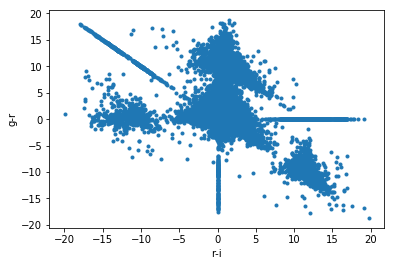

In [6]:
#colour-colour
plt.scatter(deepr-deepi,deepg-deepr, marker='.') #,markersize=10 )
plt.xlabel('r-i')
plt.ylabel('g-r')

In [5]:
#read in gold 
catname = '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5'

f = h.File(catname,'r')
print(f['catalog'].keys())
print(f['catalog/gold'].keys())
print(f['catalog/gold/coadd_object_id'])

#FLAGS_GOLD  If you are using SExtractor quantities, you should add (FLAGS_GOLD & 1111000) = 0; and (FLAGS_BADREGIONS & 01) = 0

#gflag = np.array(f['catalog/gold/flags_gold'])
#print(gflag)

ra = np.array(f['catalog/gold/ra'])#[star_mask] 
dec = np.array(f['catalog/gold/dec'])#[star_mask]
print(len(ra))

"""#cosmos only
ra=ra[(ra<53)] # & (ra>49)]
#dec=dec[cosmosonly]
print(len(ra))
ra=ra[(ra>51)]
print(len(ra))"""

zeropt=30
g = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_g']))#[star_mask]
r = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_r']))#[star_mask]
i = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_i']))#[star_mask]
z = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_z']))#[star_mask]

print(len(r))

"""cosmosonly=np.where(  (ra<max(deep['ra'])) & (ra>min(deep['ra']))
               &  (dec<max(deep['dec'])) & (dec>min(deep['dec']))   )
i=i[cosmosonly]
z=z[cosmosonly]
r=r[cosmosonly]
print(len(r))"""
print(min(ra)) 
print(max(ra))
"""
ra=ra[np.where((i<30) & (i>0))]
dec=dec[np.where((i<30)& (i>0))]
z=z[np.where((i<30)& (i>0))]
r=r[np.where((i<30)& (i>0))]
i=i[np.where((i<30)& (i>0))]
g=g[np.where((i<30)& (i>0))]
print(len(ra))
"""
ra[ra > 180] -= 360

gold=np.column_stack((ra,dec,g,r,i,z))
print(gold)
#gold = gold[gold[:,0].argsort()][:1000000]

#gold=gold[np.where(ra>min(deep['ra']))]
#,max(deep['ra'])

print(gold)
print(len(gold))
goldra=gold[:,0]
golddec=gold[:,1]
goldr=gold[:,2]
goldi=gold[:,3]
goldz=gold[:,4]
goldg=gold[:,4]

[u'metacal', u'gold', u'bpz', u'dnf', u'redmagic', u'redmapper']
[u'a_sed_sfd98_g', u'a_sed_sfd98_i', u'a_sed_sfd98_r', u'a_sed_sfd98_z', u'coadd_object_id', u'dec', u'delta_mag_chrom_g', u'delta_mag_chrom_i', u'delta_mag_chrom_r', u'delta_mag_chrom_z', u'delta_mag_y4_g', u'delta_mag_y4_i', u'delta_mag_y4_r', u'delta_mag_y4_z', u'ebv_sfd98', u'flags', u'flags_badregions', u'flags_footprint', u'flags_foreground', u'flags_gold', u'flags_phot', u'hpix_16384', u'n_images_g', u'n_images_i', u'n_images_r', u'n_images_z', u'ra', u'sextractor_flags_g', u'sextractor_flags_i', u'sextractor_flags_r', u'sextractor_flags_z', u'sof_cm_flux_corrected_g', u'sof_cm_flux_corrected_i', u'sof_cm_flux_corrected_r', u'sof_cm_flux_corrected_z', u'sof_cm_flux_err_g', u'sof_cm_flux_err_i', u'sof_cm_flux_err_r', u'sof_cm_flux_err_z', u'sof_cm_mag_corrected_g', u'sof_cm_mag_corrected_i', u'sof_cm_mag_corrected_r', u'sof_cm_mag_corrected_z', u'sof_cm_mag_err_g', u'sof_cm_mag_err_i', u'sof_cm_mag_err_r', u'sof_cm_

/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in l

399263026
1.52399081799e-06
359.999999531


/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater
/global/u2/a/aamon/.conda/envs/DESenv/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in le

386507259
[[  4.50014413e+01   3.70761157e-03   2.30693595e+01   2.19896551e+01
    2.16150501e+01   2.12456644e+01]
 [  4.49972535e+01   1.04404433e-02              nan   2.18234535e+01
    2.06837332e+01   2.01906007e+01]
 [  4.49971163e+01   9.44756779e-03   2.26564089e+01   2.30809067e+01
    2.32646955e+01   2.25322793e+01]
 ..., 
 [ -4.36099674e+01  -1.18839131e+00   2.34535971e+01   2.49294658e+01
    2.29473335e+01   2.25773147e+01]
 [ -4.36099435e+01  -1.18586508e+00   2.41496769e+01   2.62731173e+01
    2.34795196e+01   2.30166985e+01]
 [ -4.36069619e+01  -1.18399895e+00   2.46070425e+01   2.05802013e+01
    2.04590621e+01   2.03480711e+01]]
[[  4.50014413e+01   3.70761157e-03   2.30693595e+01   2.19896551e+01
    2.16150501e+01   2.12456644e+01]
 [  4.49972535e+01   1.04404433e-02              nan   2.18234535e+01
    2.06837332e+01   2.01906007e+01]
 [  4.49971163e+01   9.44756779e-03   2.26564089e+01   2.30809067e+01
    2.32646955e+01   2.25322793e+01]
 ..., 
 [ -4.360996

In [7]:
#match galaxies by ra and dec

from astropy.coordinates import SkyCoord
from astropy import units as u

goldcat = SkyCoord(ra=goldra*u.degree, dec=golddec*u.degree)  
catalog = SkyCoord(ra=deepra*u.degree, dec=deepdec*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(goldcat, nthneighbor=1) 

print(goldra[idx])


[ 51.85327893  51.82515254  51.68840129 ...,  53.09443852  53.01671455
  53.10565984]


386507259
824876
782464
[0d00m05.4736s 0d00m09.367s 0d00m11.5942s ..., 0d00m00.18s 0d00m04.485s
 0d00m00.1758s]
[  5.47355891   9.36702156  11.59423724 ...,   0.17997459   4.48503093
   0.17584039]
      ra     
-------------
51.8516153378
51.8222189332
51.8892458549
51.6242157831
51.6832494256
51.8036194419
51.9290812858
51.8006391378
51.8618474369
 51.800015027
          ...
53.0709284975
53.1080164199
53.0347201135
53.1249258082
53.1718915582
53.0174805458
53.0929557707
53.1509518416
53.0944895282
53.0157242138
53.1057047174
Length = 674911 rows


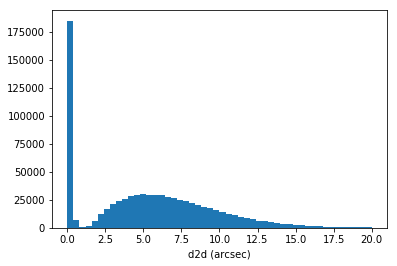

In [8]:
print(len(goldra)) 
print(len(deep['bdf_mag'])) 
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50, range=(0, 20)) #20 is the max matching range in arcmin
plt.xlabel('d2d (arcsec)')
print(deepra[d2d.arcsecond < 10])

51.418463901 53.8784566536
51.4202978722 53.8739418576


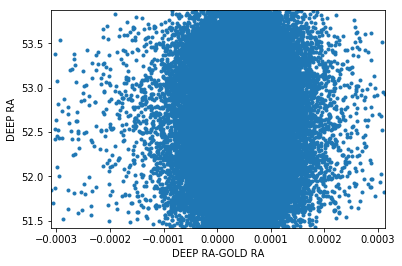

In [9]:
matchlim=1
plt.scatter(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)],deepra[np.where(d2d.arcsecond < matchlim)], marker='.')
plt.xlabel('DEEP RA-GOLD RA')
plt.ylabel('DEEP RA')
plt.ticklabel_format(useOffset=False)
#plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(deepra[np.where(d2d.arcsecond < matchlim)]),max(deepra[np.where(d2d.arcsecond < matchlim)]) )
plt.xlim(min(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)]),max(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)]) )
print(min(goldra[idx]),max(goldra[idx]) )
print(min(deepra),max(deepra))

In [12]:
#GB: take the median mag difference of objects with 0.5*(gold+deep) < 22
#We don’t want selection or noise biases to bias the measurement of this offset, so we want to restrict to mags where both catalogs are complete.

match=np.column_stack((goldg[idx][np.where(d2d.arcsecond < matchlim)], deepg[np.where(d2d.arcsecond < matchlim)],  
                       goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 
                       goldi[idx][np.where(d2d.arcsecond < matchlim)], deepi[np.where(d2d.arcsecond < matchlim)], 
                       goldz[idx][np.where(d2d.arcsecond < matchlim)], deepz[np.where(d2d.arcsecond < matchlim)],
                       goldra[idx][np.where(d2d.arcsecond < matchlim)], deepra[np.where(d2d.arcsecond < matchlim)]))

print(np.shape(match))
#gold deep
#g 01
#r 23
#i 45
#z 67

#gold < 22) & (deep < 22)  
maglim=30
match=match[np.where( (match[:,0] < maglim) & (match[:,1] < maglim) )]
print(np.shape(match))
match=match[np.where( (match[:,2] < maglim))]  #& (match[:,3] < 22) )]
match=match[np.where( match[:,3] < 22)] #rdeep cut

print(np.shape(match))
match=match[np.where( (match[:,4] < maglim) & (match[:,5] < maglim) )]
print(np.shape(match))
match=match[np.where( (match[:,6] < maglim) & (match[:,7] < maglim) )]
print(np.shape(match))

"""
magsumlim=60
rsum=  match[:,2]+match[:,3]
print(rsum)
match=match[np.where(rsum < magsumlim)]
rsum=rsum[np.where(rsum < magsumlim)]
print(rsum)
print(np.shape(match))
print(match[:,8])
print("***")
print(match[:,9])

gsum=  match[:,0]+match[:,1]
match=match[np.where(gsum < magsumlim)]
print(np.shape(match))

isum=  match[:,4]+match[:,5]
match=match[np.where(isum < magsumlim)]
print(np.shape(match))

zsum=  match[:,6]+match[:,7]
match=match[np.where(zsum < magsumlim)]
print(np.shape(match))
"""
goldgselect=match[:,0]
deepgselect=match[:,1]

goldrselect=match[:,2]
deeprselect=match[:,3]

goldiselect=match[:,4]
deepiselect=match[:,5]

goldzselect=match[:,6]
deepzselect=match[:,7]

"""goldg=goldg[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]
goldi=goldi[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]
goldz=goldz[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]
print(len(goldr[idx][np.where(d2d.arcsecond < matchlim)]))
print(len(goldrselect))
print(rsum)

#usum=  goldu[idx][np.where(d2d.arcsecond < matchlim)] + deepu[np.where(d2d.arcsecond < matchlim)] 
#golduselect=goldu[idx][np.where(d2d.arcsecond < matchlim)][np.where(usum < 44)]
print(len(goldg))
gsum=  goldg[idx][np.where(d2d.arcsecond < matchlim)] + deepg[np.where(d2d.arcsecond < matchlim)] 
goldgselect=goldg[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]
goldi=goldi[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]
goldz=goldz[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]
goldrselect=goldrselect[np.where(gsum < 44)]
print(len(goldgselect))

isum=  goldi[idx][np.where(d2d.arcsecond < matchlim)] + deepi[np.where(d2d.arcsecond < matchlim)] 
goldiselect=goldi[idx][np.where(d2d.arcsecond < matchlim)][np.where(isum < 44)]
print(len(goldiselect))

zsum=  goldz[idx][np.where(d2d.arcsecond < matchlim)] + deepz[np.where(d2d.arcsecond < matchlim)] 
goldzselect=goldz[idx][np.where(d2d.arcsecond < matchlim)][np.where(zsum < 44)]
print(len(goldzselect))"""

(193058, 10)
(192837, 10)
(26282, 10)
(26282, 10)
(26230, 10)


'goldg=goldg[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]\ngoldi=goldi[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]\ngoldz=goldz[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]\nprint(len(goldr[idx][np.where(d2d.arcsecond < matchlim)]))\nprint(len(goldrselect))\nprint(rsum)\n\n#usum=  goldu[idx][np.where(d2d.arcsecond < matchlim)] + deepu[np.where(d2d.arcsecond < matchlim)] \n#golduselect=goldu[idx][np.where(d2d.arcsecond < matchlim)][np.where(usum < 44)]\nprint(len(goldg))\ngsum=  goldg[idx][np.where(d2d.arcsecond < matchlim)] + deepg[np.where(d2d.arcsecond < matchlim)] \ngoldgselect=goldg[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]\ngoldi=goldi[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]\ngoldz=goldz[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]\ngoldrselect=goldrselect[np.where(gsum < 44)]\nprint(len(goldgselect))\n\nisum=  goldi[idx][np.where(d2d.arcsecond < matchlim)] + deepi[np.whe

percentage matched:  24.6730840013
782464
782464
[ 25.60667004  23.76512031  24.73208677 ...,  24.06427153  25.23322199
  24.4463312 ]
***
[ 20.37354699  21.69487431  19.09062226 ...,  21.96586713  21.80932664
  21.78728854]


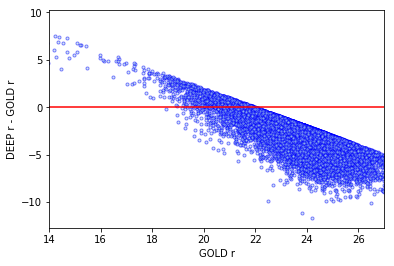

In [27]:
#plot magnitudes
#print(len(goldr[idx][np.where(d2d.arcsecond < matchlim)]))
#print(len(deep['bdf_mag'][np.where(d2d.arcsecond < matchlim)]))


#3372/14324  #gold matches/all deep ~quarter
print("percentage matched: ", float(len(deepr[np.where(d2d.arcsecond < matchlim)]))/float(len(deepr))*100.)
#fit = np.polyfit(goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
print(len(deepr))
print(len(deepr[deepr>0]))
#plt.plot(goldr[idx][np.where(d2d.arcsecond < matchlim)], fit_fn(goldr[idx][np.where(d2d.arcsecond < matchlim)]), '--k')
#x = np.linspace(14, 40, 1000)
#plt.plot(x,x,color='red')

print(goldrselect)
print("***")
print(deeprselect)
plt.scatter(goldrselect, deeprselect-goldrselect, marker='.', facecolors='lightblue', color='blue',alpha=0.5)
plt.xlim(14,27)
plt.axhline(y=0, color='red')
#plt.ylim(16,38)
plt.xlabel('GOLD r')
plt.ylabel('DEEP r - GOLD r')

In [ ]:
#plot magnitudes

#fit = np.polyfit(goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
#plt.plot(goldr[idx][np.where(d2d.arcsecond < matchlim)], fit_fn(goldr[idx][np.where(d2d.arcsecond < matchlim)]), '--k')
#x = np.linspace(14, 40, 1000)
#plt.plot(x,x,color='red')
plt.scatter(goldiselect, deepiselect-goldiselect, marker='.', facecolors='lightblue', color='blue',alpha=0.5)
plt.xlim(14,28)
#plt.ylim(15,30)
plt.axhline(y=0, color='red')
plt.xlabel('GOLD i')
plt.ylabel('DEEP i - GOLD i')

ValueError: object too deep for desired array

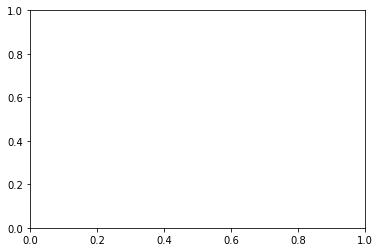

In [15]:
plt.hist(deep, 50, range=(15, 30))
plt.hist(deepiselect, 50, range=(15, 30))
plt.xlabel('i')

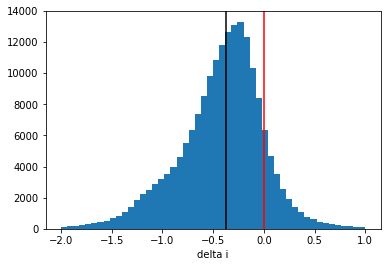

In [49]:
plt.hist(deepiselect-goldiselect, 50, range=(-2, 1))
plt.axvline(x=0, color='red')
plt.axvline(x=np.median(deepiselect-goldiselect), color='black')
#plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('delta i')

-3.05568148109


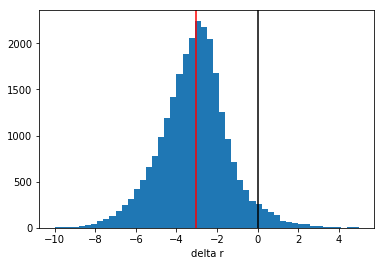

In [26]:
plt.hist(deeprselect-goldrselect, 50, range=(-10, 5))
plt.axvline(x=0, color='black')
print(np.median(deeprselect-goldrselect))
plt.axvline(x=np.median(deeprselect-goldrselect), color='red')
#plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('delta r')

#### colour-colour
plt.scatter(deeprselect-deepiselect,deepgselect-deeprselect, marker='.') #,markersize=10 )
plt.xlabel('r-i')
plt.ylabel('g-r')